In [24]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [25]:
df = pd.read_csv("CC-topic-modelling-python-master/climate_tweets.csv")

In [26]:
df[:10]

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...
6,Global warming evidence all around us|A messag...
7,Migratory Birds' New Climate Change Strategy: ...
8,Southern Africa: Competing for Limpopo Water: ...
9,"Global warming to impact wheat, rice productio..."


In [28]:
df.tweet.unique().shape

(5541,)

In [29]:
# normal function example
def my_normal_function(x):
    return x**2 + 10
# lambda function example
my_lambda_function = lambda x: x**2 + 10

In [30]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

773

In [31]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

677

In [32]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


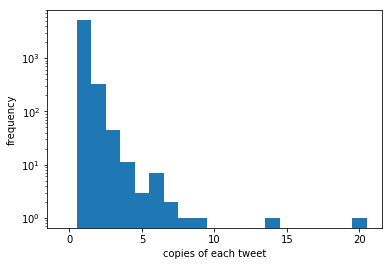

In [33]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [34]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [36]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [37]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [38]:
df[:10]

,tweet,is_retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[]
6,Global warming evidence all around us|A messag...,False,[],[],[]
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[]
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[]
9,"Global warming to impact wheat, rice productio...",False,[],[],[]


In [39]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [40]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [43]:
flattened_hashtags_df[:10]

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot
5,#tornadocot
6,#ocra
7,#sgp
8,#gop
9,#ucot


In [44]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

477

In [45]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [47]:
popular_hashtags[:10]

,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47
5,#teaparty,41
6,#global,40
7,#eco,40
8,#SaveTerra,36
9,#climategate,33


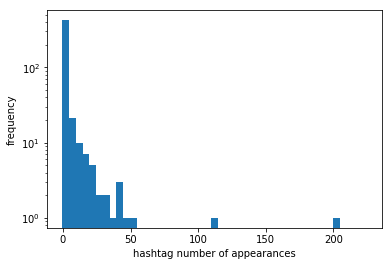

In [48]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [49]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [50]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [51]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [54]:
hashtag_vector_df[:10]

,popular_hashtags,#energy,#environment,#p2,#EarthDay,#UN,#cleantech,#teaparty,#news,#TCOT,...,#News,#SaveTerra,#eco,#climategate,#tcot,#Climate,#sgp,#climatechange,#du1,#Green
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,[#EarthDay],0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39,"[#tcot, #p2]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48,"[#IPCC, #teaparty]",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
70,"[#global, #climate, #eco]",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
137,[#climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,[#green],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,[#climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

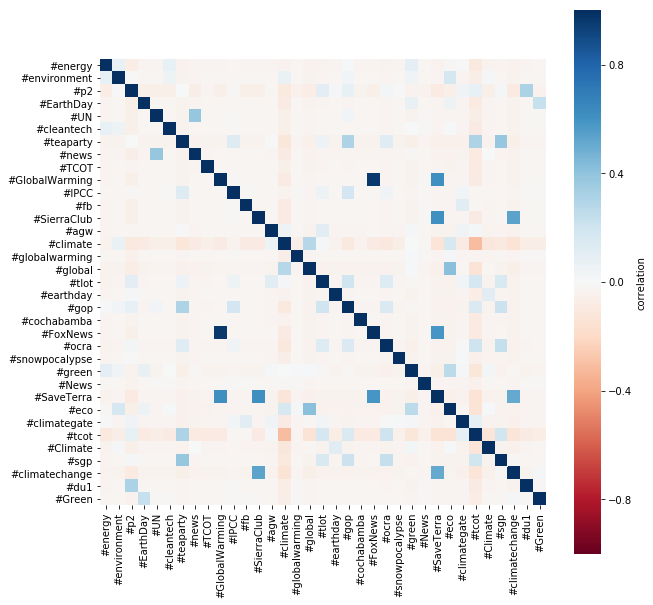

In [59]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [60]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [61]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [62]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [63]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [65]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [66]:
model.fit(tf)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [67]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [70]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,chang,637.9,snow,302.3,warm,820.7,global,1419.1,climat,678.2,global,910.5,climat,1726.1,dc,153.5,climat,543.3,via,571.0
1,climat,519.1,news,230.3,global,812.5,warm,1381.0,chang,656.9,warm,894.8,chang,1600.5,volcano,123.7,chang,508.2,energi,175.7
2,#climate,232.9,think,123.2,scienc,209.0,obama,154.4,new,290.2,#tcot,257.8,un,128.3,like,106.8,bill,235.7,mean,90.7
3,day,152.4,believ,119.1,scientist,194.5,say,113.0,peopl,167.8,get,179.1,legisl,120.8,help,106.0,senat,169.2,tell,69.7
4,earth,114.9,weather,115.7,gore,143.9,may,112.7,report,157.0,one,119.2,nation,92.3,take,96.7,studi,112.8,skeptic,67.9
5,green,110.7,global,99.4,al,129.8,caus,106.3,world,151.9,call,106.4,need,86.9,com,93.2,great,99.4,part,62.8
6,go,108.3,warm,89.5,due,80.9,come,72.6,u,135.2,make,105.1,issu,85.7,stop,85.3,graham,83.7,question,58.7
7,carbon,93.9,good,88.1,use,79.2,want,71.9,confer,111.5,time,98.6,impact,85.1,ice,85.2,talk,83.2,post,58.6
8,live,87.0,#p,83.3,debat,73.4,air,67.5,agenc,103.3,effect,92.2,c,81.1,action,78.5,put,73.7,million,57.4
9,us,79.3,thing,71.0,india,69.9,top,58.0,storm,89.3,winter,91.4,p,76.5,anoth,66.6,fight,59.9,public,57.3


In [88]:
df['clean_tweet'][0].split(" ")

['global',
 'warm',
 'report',
 'urg',
 'govern',
 'act',
 'brussel',
 'belgium',
 'ap',
 'world',
 'face',
 'increas',
 'hunger',
 '']

In [72]:
from numpy.random import multinomial
from numpy import log, exp
from numpy import argmax
import json

class MovieGroupProcess:
    def __init__(self, K=8, alpha=0.1, beta=0.1, n_iters=30):
        '''
        A MovieGroupProcess is a conceptual model introduced by Yin and Wang 2014 to
        describe their Gibbs sampling algorithm for a Dirichlet Mixture Model for the
        clustering short text documents.
        Reference: http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        Imagine a professor is leading a film class. At the start of the class, the students
        are randomly assigned to K tables. Before class begins, the students make lists of
        their favorite films. The teacher reads the role n_iters times. When
        a student is called, the student must select a new table satisfying either:
            1) The new table has more students than the current table.
        OR
            2) The new table has students with similar lists of favorite movies.
        :param K: int
            Upper bound on the number of possible clusters. Typically many fewer
        :param alpha: float between 0 and 1
            Alpha controls the probability that a student will join a table that is currently empty
            When alpha is 0, no one will join an empty table.
        :param beta: float between 0 and 1
            Beta controls the student's affinity for other students with similar interests. A low beta means
            that students desire to sit with students of similar interests. A high beta means they are less
            concerned with affinity and are more influenced by the popularity of a table
        :param n_iters:
        '''
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.n_iters = n_iters

        # slots for computed variables
        self.number_docs = None
        self.vocab_size = None
        self.cluster_doc_count = [0 for _ in range(K)]
        self.cluster_word_count = [0 for _ in range(K)]
        self.cluster_word_distribution = [{} for i in range(K)]

    @staticmethod
    def from_data(K, alpha, beta, D, vocab_size, cluster_doc_count, cluster_word_count, cluster_word_distribution):
        '''
        Reconstitute a MovieGroupProcess from previously fit data
        :param K:
        :param alpha:
        :param beta:
        :param D:
        :param vocab_size:
        :param cluster_doc_count:
        :param cluster_word_count:
        :param cluster_word_distribution:
        :return:
        '''
        mgp = MovieGroupProcess(K, alpha, beta, n_iters=30)
        mgp.number_docs = D
        mgp.vocab_size = vocab_size
        mgp.cluster_doc_count = cluster_doc_count
        mgp.cluster_word_count = cluster_word_count
        mgp.cluster_word_distribution = cluster_word_distribution
        return mgp

    @staticmethod
    def _sample(p):
        '''
        Sample with probability vector p from a multinomial distribution
        :param p: list
            List of probabilities representing probability vector for the multinomial distribution
        :return: int
            index of randomly selected output
        '''
        return [i for i, entry in enumerate(multinomial(1, p)) if entry != 0][0]

    def fit(self, docs, vocab_size):
        '''
        Cluster the input documents
        :param docs: list of list
            list of lists containing the unique token set of each document
        :param V: total vocabulary size for each document
        :return: list of length len(doc)
            cluster label for each document
        '''
        alpha, beta, K, n_iters, V = self.alpha, self.beta, self.K, self.n_iters, vocab_size

        D = len(docs)
        self.number_docs = D
        self.vocab_size = vocab_size

        # unpack to easy var names
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution
        cluster_count = K
        d_z = [None for i in range(len(docs))]

        # initialize the clusters
        for i, doc in enumerate(docs):

            # choose a random  initial cluster for the doc
            z = self._sample([1.0 / K for _ in range(K)])
            d_z[i] = z
            m_z[z] += 1
            n_z[z] += len(doc)

            for word in doc:
                if word not in n_z_w[z]:
                    n_z_w[z][word] = 0
                n_z_w[z][word] += 1

        for _iter in range(n_iters):
            total_transfers = 0

            for i, doc in enumerate(docs):

                # remove the doc from it's current cluster
                z_old = d_z[i]

                m_z[z_old] -= 1
                n_z[z_old] -= len(doc)

                for word in doc:
                    n_z_w[z_old][word] -= 1

                    # compact dictionary to save space
                    if n_z_w[z_old][word] == 0:
                        del n_z_w[z_old][word]

                # draw sample from distribution to find new cluster
                p = self.score(doc)
                z_new = self._sample(p)

                # transfer doc to the new cluster
                if z_new != z_old:
                    total_transfers += 1

                d_z[i] = z_new
                m_z[z_new] += 1
                n_z[z_new] += len(doc)

                for word in doc:
                    if word not in n_z_w[z_new]:
                        n_z_w[z_new][word] = 0
                    n_z_w[z_new][word] += 1

            cluster_count_new = sum([1 for v in m_z if v > 0])
            print("In stage %d: transferred %d clusters with %d clusters populated" % (
            _iter, total_transfers, cluster_count_new))
            if total_transfers == 0 and cluster_count_new == cluster_count and _iter>25:
                print("Converged.  Breaking out.")
                break
            cluster_count = cluster_count_new
        self.cluster_word_distribution = n_z_w
        return d_z

    def score(self, doc):
        '''
        Score a document
        Implements formula (3) of Yin and Wang 2014.
        http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        :param doc: list[str]: The doc token stream
        :return: list[float]: A length K probability vector where each component represents
                              the probability of the document appearing in a particular cluster
        '''
        alpha, beta, K, V, D = self.alpha, self.beta, self.K, self.vocab_size, self.number_docs
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution

        p = [0 for _ in range(K)]

        #  We break the formula into the following pieces
        #  p = N1*N2/(D1*D2) = exp(lN1 - lD1 + lN2 - lD2)
        #  lN1 = log(m_z[z] + alpha)
        #  lN2 = log(D - 1 + K*alpha)
        #  lN2 = log(product(n_z_w[w] + beta)) = sum(log(n_z_w[w] + beta))
        #  lD2 = log(product(n_z[d] + V*beta + i -1)) = sum(log(n_z[d] + V*beta + i -1))

        lD1 = log(D - 1 + K * alpha)
        doc_size = len(doc)
        for label in range(K):
            lN1 = log(m_z[label] + alpha)
            lN2 = 0
            lD2 = 0
            for word in doc:
                lN2 += log(n_z_w[label].get(word, 0) + beta)
            for j in range(1, doc_size +1):
                lD2 += log(n_z[label] + V * beta + j - 1)
            p[label] = exp(lN1 - lD1 + lN2 - lD2)

        # normalize the probability vector
        pnorm = sum(p)
        pnorm = pnorm if pnorm>0 else 1
        return [pp/pnorm for pp in p]

    def choose_best_label(self, doc):
        '''
        Choose the highest probability label for the input document
        :param doc: list[str]: The doc token stream
        :return:
        '''
        p = self.score(doc)
        return argmax(p),max(p)

In [117]:
mgp = MovieGroupProcess(K=100, alpha=0.1, beta=0.1, n_iters=30)

In [101]:
docs = df['clean_tweet'].tolist()

In [118]:
y = mgp.fit(docs,1000)

In stage 0: transferred 6010 clusters with 100 clusters populated
In stage 1: transferred 4899 clusters with 43 clusters populated
In stage 2: transferred 3507 clusters with 22 clusters populated
In stage 3: transferred 3053 clusters with 16 clusters populated
In stage 4: transferred 2801 clusters with 15 clusters populated
In stage 5: transferred 2688 clusters with 14 clusters populated
In stage 6: transferred 2606 clusters with 13 clusters populated
In stage 7: transferred 2433 clusters with 14 clusters populated
In stage 8: transferred 2364 clusters with 14 clusters populated
In stage 9: transferred 2251 clusters with 14 clusters populated
In stage 10: transferred 2181 clusters with 15 clusters populated
In stage 11: transferred 2160 clusters with 14 clusters populated
In stage 12: transferred 2120 clusters with 14 clusters populated
In stage 13: transferred 2094 clusters with 13 clusters populated
In stage 14: transferred 2052 clusters with 13 clusters populated
In stage 15: transf

In [123]:
z = []
for item in y: 
    if item not in z:
        z.append(item)

In [124]:
z

[73, 57, 88, 58, 77, 47, 46, 1, 83, 50, 82, 71]

In [125]:
for item in z: 
    print(y.count(item))

23
15
50
17
28
10
16
23
4
2937
2275
692


In [126]:
df[:10]

,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,False,[],[],[],"[global, warm, report, urg, govern, act, bruss..."
1,Fighting poverty and global warming in Africa ...,False,[],[],[],"[fight, poverti, global, warm, africa, ]"
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],"[carbon, offset, vatican, forest, fail, reduc,..."
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],"[carbon, offset, vatican, forest, fail, reduc,..."
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],"[uruguay, tool, need, vulner, climat, chang, ]"
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[],"[, ocean, salti, show, global, warm, intensifi..."
6,Global warming evidence all around us|A messag...,False,[],[],[],"[global, warm, evid, around, us, messag, globa..."
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[],"[migratori, bird, new, climat, chang, strategi..."
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[],"[southern, africa, compet, limpopo, water, cli..."
9,"Global warming to impact wheat, rice productio...",False,[],[],[],"[global, warm, impact, wheat, rice, product, i..."


In [127]:
df['cluster']=y

In [134]:
df[:10]

,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet,cluster
0,Global warming report urges governments to act...,False,[],[],[],"[global, warm, report, urg, govern, act, bruss...",73
1,Fighting poverty and global warming in Africa ...,False,[],[],[],"[fight, poverti, global, warm, africa, ]",57
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],"[carbon, offset, vatican, forest, fail, reduc,...",88
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],"[carbon, offset, vatican, forest, fail, reduc,...",88
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],"[uruguay, tool, need, vulner, climat, chang, ]",73
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[],"[, ocean, salti, show, global, warm, intensifi...",58
6,Global warming evidence all around us|A messag...,False,[],[],[],"[global, warm, evid, around, us, messag, globa...",58
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[],"[migratori, bird, new, climat, chang, strategi...",77
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[],"[southern, africa, compet, limpopo, water, cli...",73
9,"Global warming to impact wheat, rice productio...",False,[],[],[],"[global, warm, impact, wheat, rice, product, i...",58


In [136]:
df[df['cluster']==88]

,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet,cluster
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],"[carbon, offset, vatican, forest, fail, reduc,...",88
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],"[carbon, offset, vatican, forest, fail, reduc,...",88
10,How do we solve this global warming thing? [link],False,[],[],[],"[solv, global, warm, thing, ]",88
11,Blog|A preliminary analysis suggests that natu...,False,[],[],[],"[blog, preliminari, analysi, suggest, natur, g...",88
17,Wait here's an idea: it's natural climate chan...,False,[],[],[],"[wait, idea, natur, climat, chang, human, indu...",88
20,Global Warming: Ocean chemistry is changing fa...,False,[],[],[],"[global, warm, ocean, chemistri, chang, faster...",88
24,@GregMitch has there been any reporting on if ...,False,[],[@GregMitch],[],"[, report, increas, sediment, upper, atmosph, ...",88
26,It's global climate change-not warming. #ac Re...,False,[],[],[#ac],"[global, climat, chang, warm, #ac, read, www, ...",88
27,A preliminary analysis suggests that natural g...,False,[],[],[],"[preliminari, analysi, suggest, natur, ga, cou...",88
37,#justinbiebersucks and global warming is a farce,False,[],[],[#justinbiebersucks],"[#justinbiebersucks, global, warm, farc]",88
